# llc4320 drifters spectra: Lagrangian vs Eulerian

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
from xhistogram.xarray import histogram
import xskillscore as xs
%matplotlib inline
from matplotlib import pyplot as plt
from cmocean import cm
import matplotlib.colors as colors

import mitequinox.utils as ut
import mitequinox.parcels as pa
import mitequinox.drifters as dr

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.6134331.datarmor0/parcels-502027/libparcels_random_0685efea-c898-41f5-9d1d-b2034a285896.so


In [2]:
if True:
    from dask.distributed import Client, LocalCluster
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster()
    cluster = PBSCluster(cores=28, processes=14) # necessary?
    w = cluster.scale(jobs=1)
    # 3 needed for lagrangian lon/lat binning
    # 15 for eulerian binning
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

In [3]:
client

Client Scheduler: tcp://10.148.0.231:41560 Dashboard: http://10.148.0.231:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


_____________
# 2 degree binning

______________
## lat*lon maps

In [83]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon_bands_2deg.zarr'))
E_Eulerian = (E_Eulerian.rename({'lat_bin':'lat_bins', 'lon_bin': 'lon_bins', 'E_SSUV':'E_Eulerian'}))
E_Eulerian

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lat_bins: 59, lon_bins: 179)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.0 -57.0 -55.0 ... 53.0 55.0 57.0
  * lon_bins        (lon_bins) float64 -179.0 -177.0 -175.0 ... 175.0 177.0
Data variables:
    E_Eulerian      (frequency_band, lon_bins, lat_bins) float64 dask.array<chunksize=(7, 90, 59), meta=np.ndarray>

In [84]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'

p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])
E_lagrangian = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon_bands_2deg.zarr')
E_lagrangian = E_lagrangian.rename({'E':'E_Lagrangian'})
E_lagrangian = E_lagrangian.E_Lagrangian
E_lagrangian

<xarray.DataArray 'E_Lagrangian' (frequency_band: 14, lon_bins: 179, lat_bins: 59)>
dask.array<open_dataset-4d37866eccf67182f5ad97690f88aa3dE, shape=(14, 179, 59), dtype=float64, chunksize=(1, 179, 30), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.0 -57.0 -55.0 ... 53.0 55.0 57.0
  * lon_bins        (lon_bins) float64 -179.0 -177.0 -175.0 ... 175.0 177.0

In [85]:
ds_E = xr.merge([E_Eulerian,E_lagrangian])
ds_E

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lat_bins: 59, lon_bins: 179)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.0 -57.0 -55.0 ... 53.0 55.0 57.0
  * lon_bins        (lon_bins) float64 -179.0 -177.0 -175.0 ... 175.0 177.0
Data variables:
    E_Eulerian      (frequency_band, lon_bins, lat_bins) float64 dask.array<chunksize=(7, 90, 59), meta=np.ndarray>
    E_Lagrangian    (frequency_band, lon_bins, lat_bins) float64 dask.array<chunksize=(1, 179, 30), meta=np.ndarray>

## 2D Histogram

In [87]:
x_bins = np.arange(0, 0.025, 0.001)
y_bins = np.arange(0, 0.025, 0.001)

SD_01cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='semidiurnal_0dot1'),
                     ds_E.E_Lagrangian.sel(frequency_band='semidiurnal_0dot1'),
                     bins=[x_bins, y_bins],
                     block_size=None)

SD_02cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='semidiurnal_0dot2'),
                     ds_E.E_Lagrangian.sel(frequency_band='semidiurnal_0dot2'),
                     bins=[x_bins, y_bins],
                     block_size=None)

SD_03cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='semidiurnal_0dot3'),
                     ds_E.E_Lagrangian.sel(frequency_band='semidiurnal_0dot3'),
                     bins=[x_bins, y_bins],
                     block_size=None)

SD_04cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='semidiurnal_0dot4'),
                     ds_E.E_Lagrangian.sel(frequency_band='semidiurnal_0dot4'),
                     bins=[x_bins, y_bins],
                     block_size=None)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, '$\\pm$0.4 cpd')

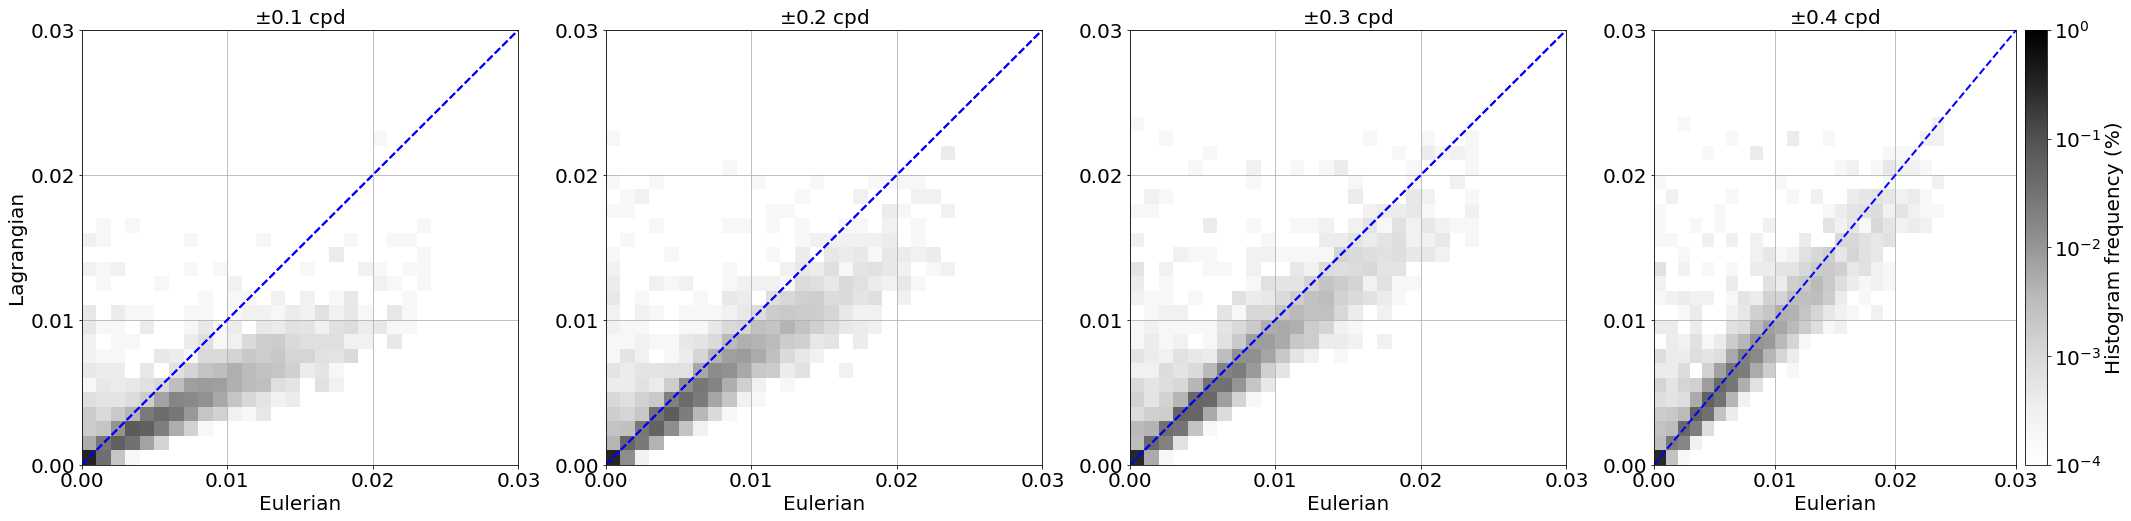

In [88]:
# Histogram for lat*lon KE
plt.rc('font', size=20) 
font_size = 20
vmin = -4
vmax = 0
cmap = 'Greys'
color = "b"
lims = (0, .03)


fig = plt.figure(figsize=(36,8))
ax = plt.subplot(141)
cax = np.log10(SD_01cpd/SD_01cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('Lagrangian',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.1 cpd',fontsize=font_size)

ax = plt.subplot(142)
cax = np.log10(SD_02cpd/SD_02cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.2 cpd',fontsize=font_size)

ax = plt.subplot(143)
cax = np.log10(SD_03cpd/SD_03cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.3 cpd',fontsize=font_size)

ax = plt.subplot(144)
cax = np.log10(SD_04cpd/SD_04cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', ticks=[-4, -3, -2, -1, 0], pad=0.02)
cbar.set_ticklabels(['10$^{-4}$','10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$'])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Histogram frequency (%)', fontsize=font_size)
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.4 cpd',fontsize=font_size)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/KE_2D_histogram_SD.png')

In [89]:
x_bins = np.arange(0, 0.025, 0.001)
y_bins = np.arange(0, 0.025, 0.001)

D_01cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='diurnal_0dot1'),
                     ds_E.E_Lagrangian.sel(frequency_band='diurnal_0dot1'),
                     bins=[x_bins, y_bins],
                     block_size=None)

D_02cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='diurnal_0dot2'),
                     ds_E.E_Lagrangian.sel(frequency_band='diurnal_0dot2'),
                     bins=[x_bins, y_bins],
                     block_size=None)

D_03cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='diurnal_0dot3'),
                     ds_E.E_Lagrangian.sel(frequency_band='diurnal_0dot3'),
                     bins=[x_bins, y_bins],
                     block_size=None)

D_04cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='diurnal_0dot4'),
                     ds_E.E_Lagrangian.sel(frequency_band='diurnal_0dot4'),
                     bins=[x_bins, y_bins],
                     block_size=None)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, '$\\pm$0.4 cpd')

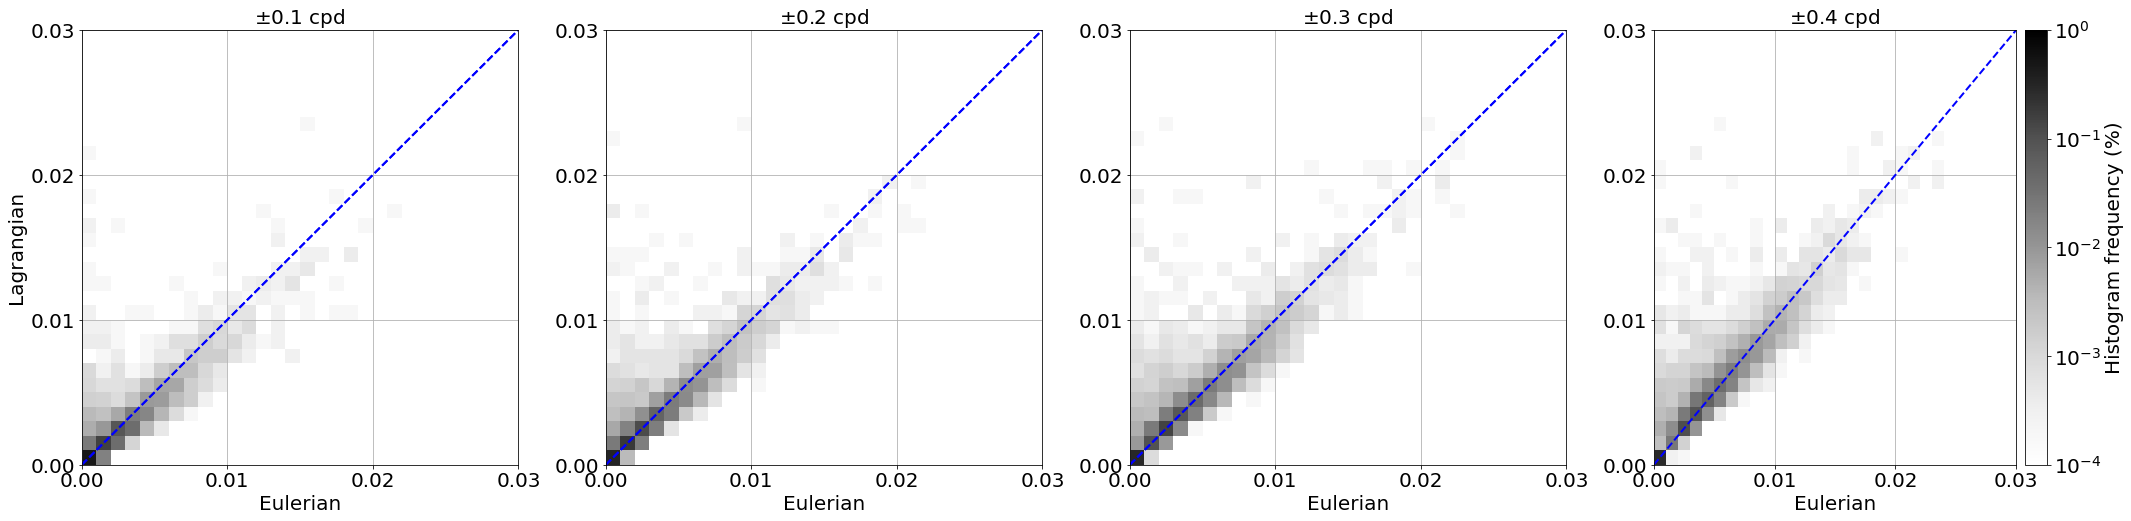

In [90]:
# Histogram for lat*lon KE
plt.rc('font', size=20) 
font_size = 20
vmin = -4
vmax = 0
cmap = 'Greys'
color = "b"
lims = (0, .03)

fig = plt.figure(figsize=(36,8))
ax = plt.subplot(141)
cax = np.log10(D_01cpd/SD_01cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('Lagrangian',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.1 cpd',fontsize=font_size)

ax = plt.subplot(142)
cax = np.log10(D_02cpd/SD_02cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.2 cpd',fontsize=font_size)

ax = plt.subplot(143)
cax = np.log10(D_03cpd/SD_03cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.3 cpd',fontsize=font_size)

ax = plt.subplot(144)
cax = np.log10(D_04cpd/SD_04cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', ticks=[-4, -3, -2, -1, 0], pad=0.02)
cbar.set_ticklabels(['10$^{-4}$','10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$'])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Histogram frequency (%)', fontsize=font_size)
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.4 cpd',fontsize=font_size)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/KE_2D_histogram_D.png')

In [91]:
x_bins = np.arange(0, 0.025, 0.001)
y_bins = np.arange(0, 0.025, 0.001)

NI_01cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='inertial_0dot1').where(np.abs(ds_E.lat_bins)>15),
                     ds_E.E_Lagrangian.sel(frequency_band='inertial_0dot1').where(np.abs(ds_E.lat_bins)>15),
                     bins=[x_bins, y_bins],
                     block_size=None)

NI_02cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='inertial_0dot2').where(np.abs(ds_E.lat_bins)>15),
                     ds_E.E_Lagrangian.sel(frequency_band='inertial_0dot2').where(np.abs(ds_E.lat_bins)>15),
                     bins=[x_bins, y_bins],
                     block_size=None)

NI_03cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='inertial_0dot3').where(np.abs(ds_E.lat_bins)>15),
                     ds_E.E_Lagrangian.sel(frequency_band='inertial_0dot3').where(np.abs(ds_E.lat_bins)>15),
                     bins=[x_bins, y_bins],
                     block_size=None)

NI_04cpd = histogram(ds_E.E_Eulerian.sel(frequency_band='inertial_0dot4').where(np.abs(ds_E.lat_bins)>15),
                     ds_E.E_Lagrangian.sel(frequency_band='inertial_0dot4').where(np.abs(ds_E.lat_bins)>15),
                     bins=[x_bins, y_bins],
                     block_size=None)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, '$\\pm$0.4 cpd')

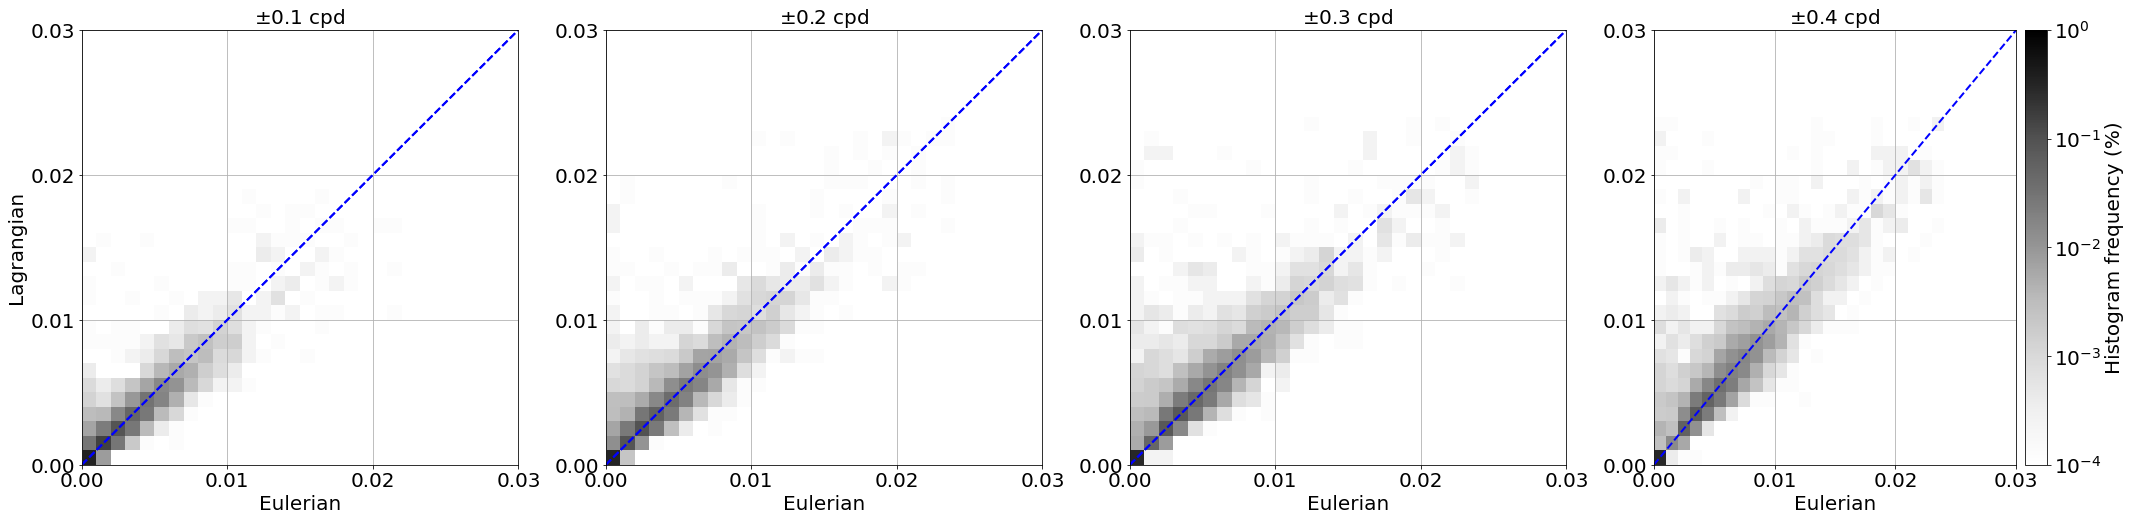

In [92]:
# Histogram for lat*lon KE
plt.rc('font', size=20) 
font_size = 20
vmin = -4
vmax = 0
cmap = 'Greys'
color = "b"
lims = (0, .03)

fig = plt.figure(figsize=(36,8))
ax = plt.subplot(141)
cax = np.log10(NI_01cpd/NI_01cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('Lagrangian',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.1 cpd',fontsize=font_size)

ax = plt.subplot(142)
cax = np.log10(NI_02cpd/NI_02cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.2 cpd',fontsize=font_size)

ax = plt.subplot(143)
cax = np.log10(NI_03cpd/NI_03cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.3 cpd',fontsize=font_size)

ax = plt.subplot(144)
cax = np.log10(NI_04cpd/NI_04cpd.sum()).plot(x='E_Eulerian_bin',y='E_Lagrangian_bin',cmap=cmap,vmin=vmin,vmax=vmax, add_colorbar = False) 
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', ticks=[-4, -3, -2, -1, 0], pad=0.02)
cbar.set_ticklabels(['10$^{-4}$','10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$'])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Histogram frequency (%)', fontsize=font_size)
ax.grid()
ax.plot(lims, lims, color=color, ls="--", linewidth=2)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('Eulerian',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_xticks([0, 0.01,0.02,0.03])
ax.set_yticks([0, 0.01,0.02,0.03])
ax.set_title('$\pm$0.4 cpd',fontsize=font_size)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/KE_2D_histogram_NI.png')

In [86]:
ds_E.load()

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lat_bins: 59, lon_bins: 179)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.0 -57.0 -55.0 ... 53.0 55.0 57.0
  * lon_bins        (lon_bins) float64 -179.0 -177.0 -175.0 ... 175.0 177.0
Data variables:
    E_Eulerian      (frequency_band, lon_bins, lat_bins) float64 0.0921 ... 0...
    E_Lagrangian    (frequency_band, lon_bins, lat_bins) float64 0.08628 ... ...

In [95]:
R = xr.corr(ds_E.E_Eulerian,
            ds_E.E_Lagrangian,
            dim=['lat_bins','lon_bins']
           )
R.values

array([0.86555184, 0.88235699, 0.77089   , 0.80866737, 0.82152322,
       0.82678235, 0.35766251, 0.42135181, 0.45709775, 0.47779766,
       0.91533244, 0.90804149, 0.87191827, 0.85243904])

In [96]:
# exclude 15S - 15N
R = xr.corr(ds_E.E_Eulerian.where(np.abs(ds_E.lat_bins)>15),
            ds_E.E_Lagrangian.where(np.abs(ds_E.lat_bins)>15),
            dim=['lat_bins','lon_bins']
           )
R.values

array([0.88753379, 0.90803799, 0.82538535, 0.84798496, 0.85314838,
       0.85306624, 0.40177134, 0.45952253, 0.49099398, 0.50977729,
       0.92863045, 0.89080834, 0.67382245, 0.63916258])

## Close cluster

In [43]:
cluster.close()